In [ ]:
# !pip install mindscope_utilities --quiet --upgrade
# !pip install seaborn

In [1]:
#import statements
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

import mindscope_utilities
import mindscope_utilities.visual_behavior_ophys as ophys

from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

pd.set_option('display.max_columns', 500)

C:\Users\sushr\AppData\Roaming\Python\Python38\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mouse_ids=[457841,449441]

In [3]:
# get cache
data_storage_directory = "F:\\nma\\Project\\dataset\\tmp" # Note: this path must exist on your local drive
cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_storage_directory)

In [4]:
session_table = cache.get_ophys_session_table()

In [5]:
mid = mouse_ids[0]
interest_table = session_table.query('mouse_id == @mid')

In [6]:
raw = []
for ind,row in interest_table.iterrows():
    raw.extend(row['ophys_experiment_id'])
print(len(raw))



45


In [7]:
exp_beh = cache.get_behavior_ophys_experiment(raw[0])


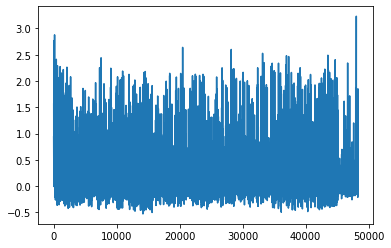

In [10]:
plt.figure()
a = exp_beh.dff_traces.query('cell_roi_id == 1080743723')
a = a['dff'].tolist()[0]
# print(a)
plt.plot(a)
plt.show()